In [ ]:
Introduction to Linear Regression 

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Generate 'random' data
np.random.seed(1)
X = 1.5 * np.random.randn(100) + 1.5   # 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # 100 residual terms
y = 2 + 0.3 * X + res                  #  Y


In [ ]:
# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# Show the first five rows of our dataframe
df.head()

,X,y
0,3.936518,2.957391
1,0.582365,2.786963
2,0.707742,2.414069
3,-0.109453,2.263953
4,2.798111,2.291978


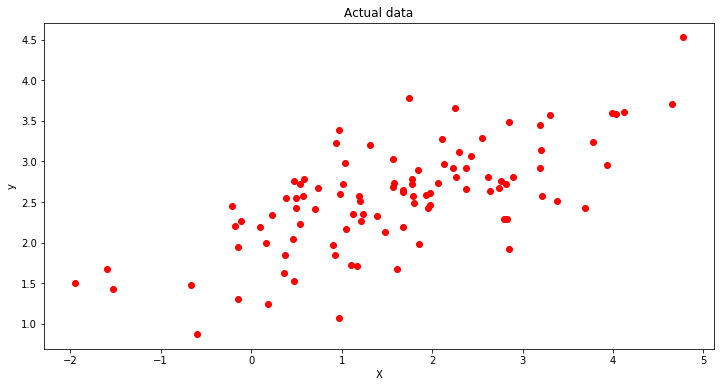

In [ ]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'ro')   # scatter plot 
plt.title('Actual data')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [ ]:
# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 2.0257931980235147
beta = 0.33180904455039056


In [ ]:
ypred = alpha + beta * X
yreal = 2+0.3*X

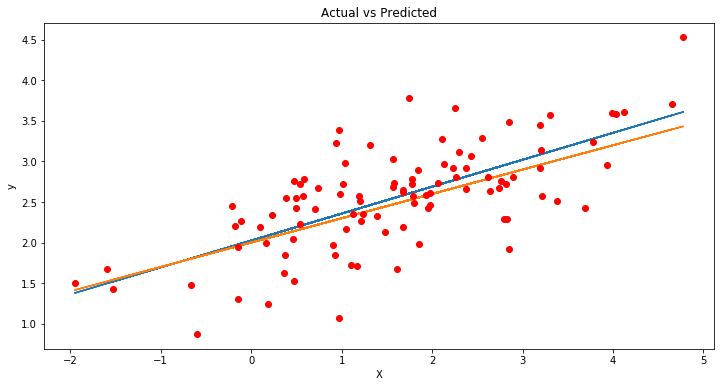

In [ ]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, yreal)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

Get data here:
https://www.kaggle.com/purbar/advertising-data#Advertising.csv  Or just google: 'kaggle Advertizement dataset'

In [ ]:
advert = pd.read_csv('Advertising.csv', index_col=0)
advert.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Sales ~ TV', data=advert)
model = model.fit()
print (model.params)

Intercept    7.032594
TV           0.047537
dtype: float64


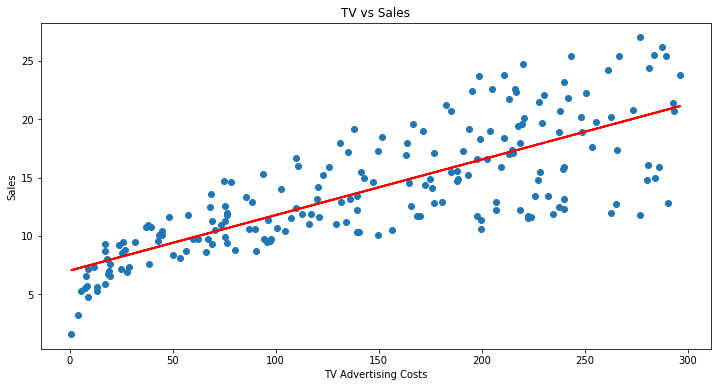

In [ ]:
# Predict values
sales_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(advert['TV'], advert['Sales'], 'o')           
plt.plot(advert['TV'], sales_pred, 'r', linewidth=2)   
plt.xlabel('TV Advertising Costs')
plt.ylabel('Sales')
plt.title('TV vs Sales')

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = ['TV', 'Radio']
X = advert[predictors]
y = advert['Sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 2.921099912405138
betas = [0.04575482 0.18799423]


In [ ]:
model.predict(X)

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696,
        7.0358597 , 17.25652015, 10.60866187,  8.81095051, 18.44466773,
       20.82891539, 12.90386507, 23.24107626,  9.94121476, 14.15384619,
       18.12139161, 14.74206357,  6.51417168, 16.54402663,  8.14035215,
       15.6080206 , 14.96769383, 17.0463346 , 19.39954145,  9.15929748,
       21.64292187, 11.35791808,  7.65045928, 18.83346334,  7.56302763,
       16.99280099, 23.36720719, 15.6258994 ,  9.91257829, 20.4405801 ,
       16.37872122, 17.29870935, 21.5621537 , 13.96692266,  8.9009974 ,
       15.16263814,  8.88644967, 21.69944046, 16.28690268,  8.18162949,
       12.64569407,  9.31962792, 20.66180115, 19.96126242, 20.35512357,
       21.30864743,  8.53774783, 12.76239488, 21.89072858, 18.10746914,
        5.74497097, 22.90418658, 16.78413768, 13.18474853, 16.96570907,
        7.82652846,  8.98703456, 12.02066194, 18.95313425, 21.09

In [ ]:
new_X = [[300, 200]]
print(model.predict(new_X))

[54.24638977]
